## **Predict Stock Price Using  Tensorflow, skikit-learn**

## This is 100% done by Hong Ka Ho

This is a self-motivated project done by Hong Ka Ho to apply deep learning strategy into stock markets. I would import 20 years daily HSI data(from 01-01-2000 to 28-06-2020)  in this experiment and then use the data to train various deep learning model. Then we would look at the performance of the trained model.
- Part 1: Neural Network 
- Part 2: Simple Linear Regression
- Part 3: Decision Tree Model
- Part 4: Random Forest Model

**WARNING: The project only serves as the purpose of applying the machine learning algorithm that I learned in other Coursera courses and the result may not be rigorous study of the stock price machanism**

# **Overview of data**

In [1]:
# Import relevant libraries into jupyter notebook first
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read the hsi csv file
hsi = pd.read_csv('HSI.csv')

In [3]:
#take a look at the first 5 rows of hsi
hsi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,17057.699219,17426.160156,17057.699219,17369.630859,17369.630859,0.0
1,2000-01-04,17303.000000,17303.000000,16933.519531,17072.820313,17072.820313,0.0
2,2000-01-05,16608.550781,16608.550781,15688.490234,15846.719727,15846.719727,0.0
3,2000-01-06,15942.070313,15971.030273,14763.969727,15153.230469,15153.230469,0.0
4,2000-01-07,15329.339844,15513.889648,15108.750000,15405.629883,15405.629883,0.0


There are Dates, Open, High, Close, Low,  Adjusted close price as well as volume in the dataframe


In [4]:
#check if there are any null data
hsi.isnull().sum()

Date          0
Open         84
High         84
Low          84
Close        84
Adj Close    84
Volume       84
dtype: int64

In [5]:
# we are going to remove the na values in the hsi
hsi = hsi.dropna()

In [6]:
#check if there are any null data again
hsi.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
#Statistical summary of the dataframe
hsi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5045.000000,5045.000000,5045.000000,5045.000000,5045.000000,5.045000e+03
mean,19792.719636,19911.792045,19646.941010,19783.405702,19783.405702,1.307398e+09
std,5737.265950,5760.794035,5704.646651,5731.398577,5731.398577,9.791033e+08
min,8351.589844,8430.620117,8331.870117,8409.009766,8409.009766,0.000000e+00
25%,14881.219727,14987.410156,14744.389648,14869.940430,14869.940430,3.354354e+08
50%,20795.929688,20904.839844,20659.279297,20803.289063,20803.289063,1.375016e+09
75%,23678.000000,23803.169922,23530.359375,23671.419922,23671.419922,1.855837e+09
max,33335.480469,33484.078125,32897.039063,33154.121094,33154.121094,9.799120e+09


In [8]:
#let use tomorrow's close price as target we want to predict in the day before
hsi['Future'] = hsi['Close'].shift(-1)
hsi.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Future
0,2000-01-03,17057.699219,17426.160156,17057.699219,17369.630859,17369.630859,0.0,17072.820313
1,2000-01-04,17303.000000,17303.000000,16933.519531,17072.820313,17072.820313,0.0,15846.719727
2,2000-01-05,16608.550781,16608.550781,15688.490234,15846.719727,15846.719727,0.0,15153.230469
3,2000-01-06,15942.070313,15971.030273,14763.969727,15153.230469,15153.230469,0.0,15405.629883
4,2000-01-07,15329.339844,15513.889648,15108.750000,15405.629883,15405.629883,0.0,15848.150391


# **Perform Data Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efcf4d43978>,
      dtype=object)

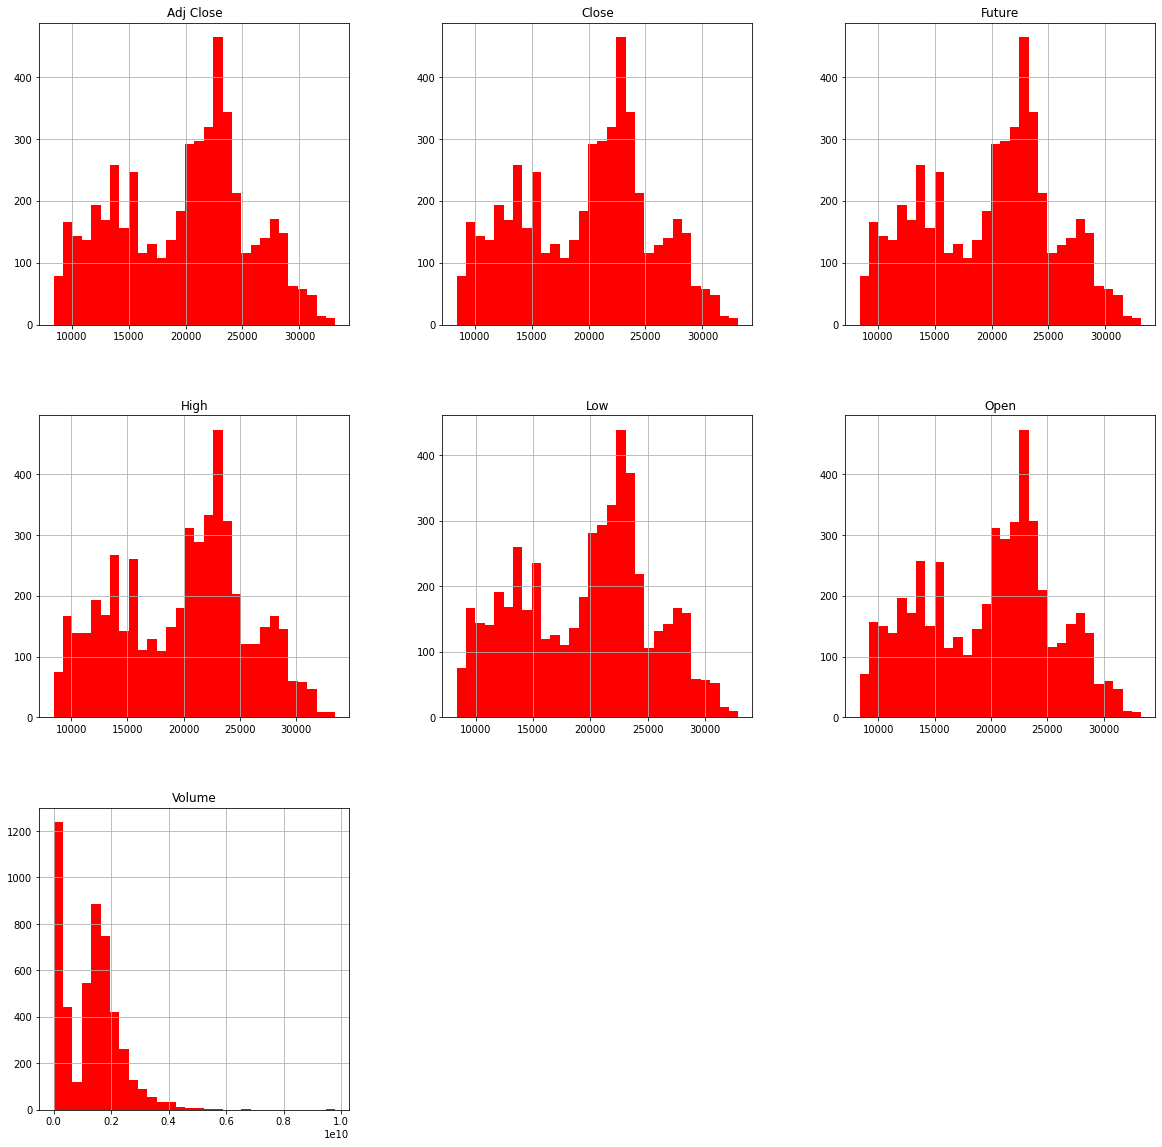

In [9]:
#plot the histogram
hsi.hist(bins = 30, figsize = (20, 20), color = 'r')

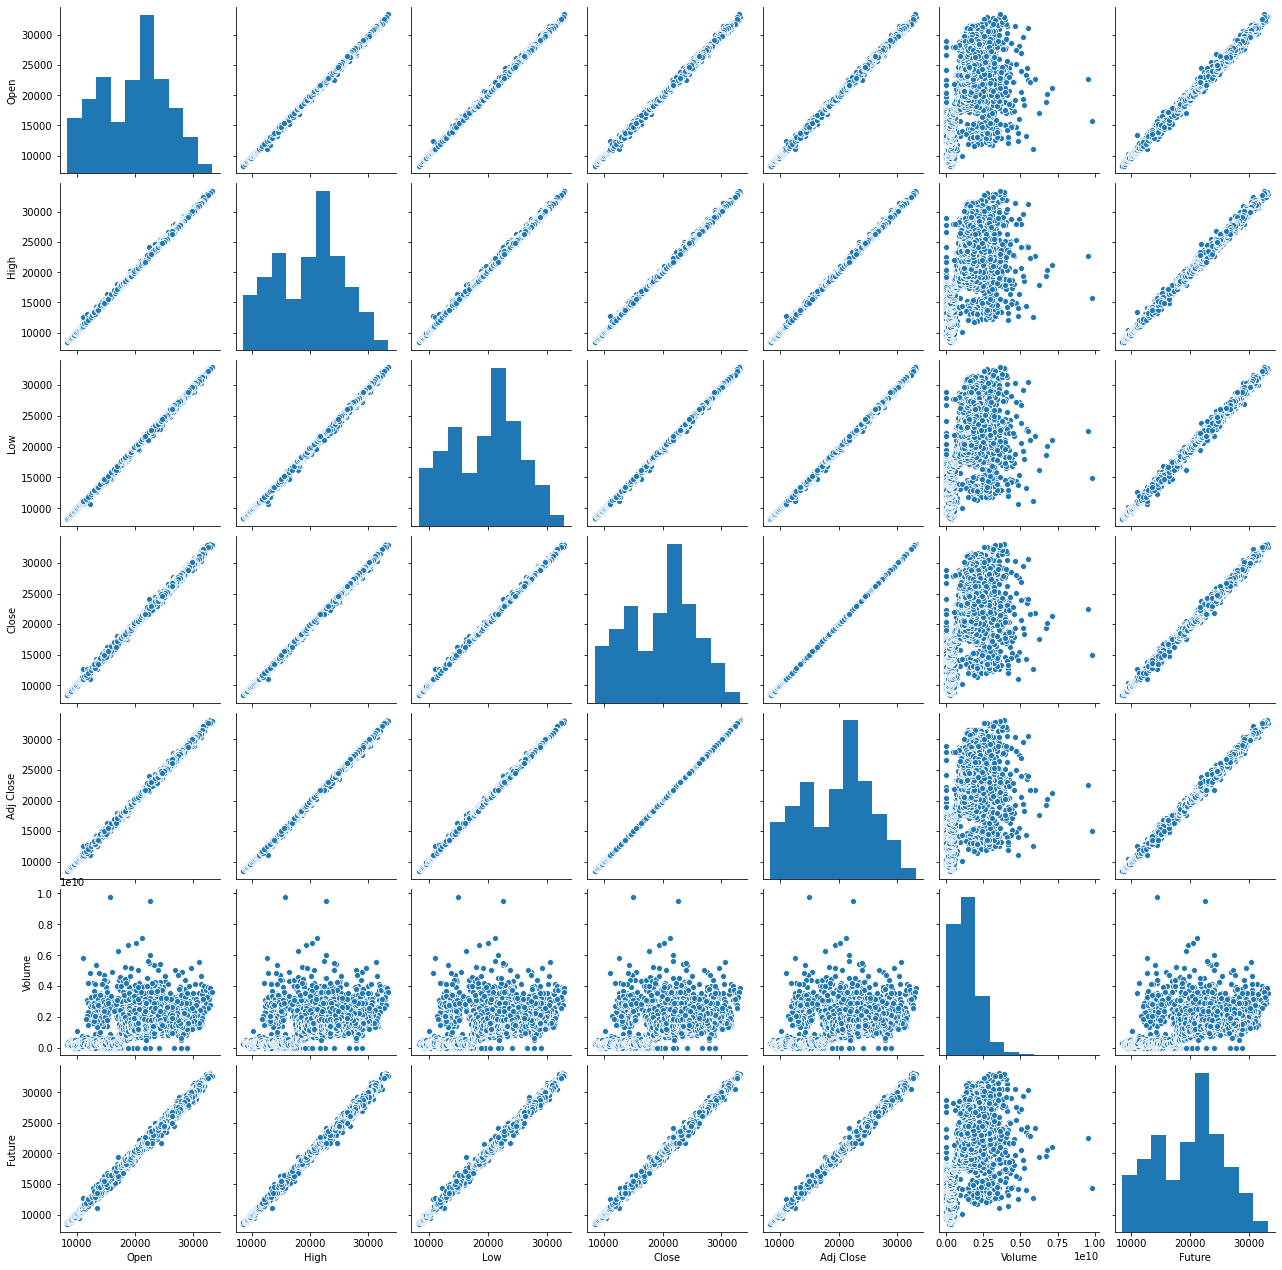

In [10]:
#use seaborn to have pair plot
sns.pairplot(hsi)

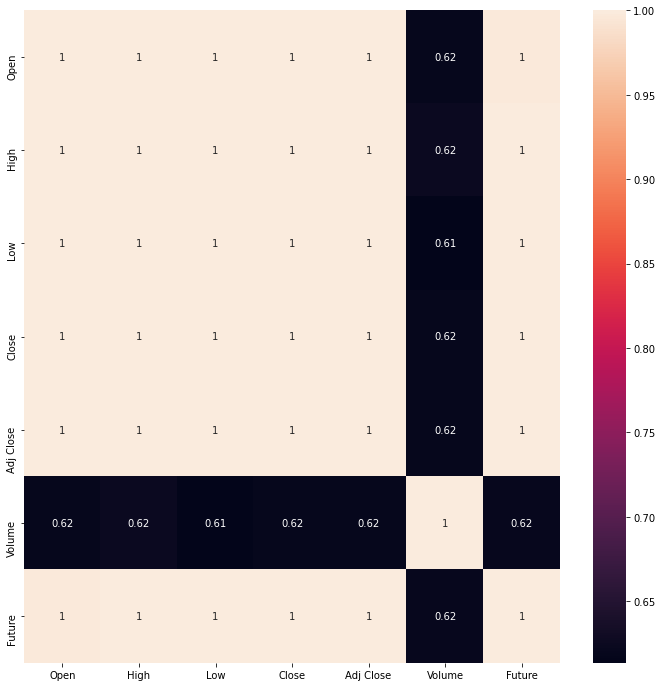

In [11]:
#look at the correlation of different columns
corr_matrix = hsi.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True)
#show the actual number in the heat map
plt.show()


## I would use a relative naive approach as discribed as followings: I would use the 5 columns in typical stock csv file including open, high, low, close price and volume as input of prediction and tomorrow's price as output of prediction

## **Limitation of this approach in statistical point of view:**
### In statistics of regression, a common problem needed to be eradicated is the omitted variable bias. Due to insufficient data avaliable in the csv file, all the inputs are price related and other important determinants that drive the stock price and highly correlated with the input are omitted. This would not only affect the precision of the prediction, it may also cause omitted variable variable bias becuase in linear regression(simple or multiple), an important assumption is that the error term is independent with the regressors. And now with omitted variables, there may be a high chance that our result is subjected to omitted variable bias.

### Another important mistake may have in this study is the imperfect multicollinearity between regressors. This means that our regressors are highly correlated as seen in the above heat map. Although their correlation is not exactly one in reality, they are close to one. Having imperfect multicollinearity will result in large standard error of the regression. Luckily, our sample size is big enough to eliminate the imperfect multicollinearity problem and still make our results valid in some sense



## Neural Network Model

### Preparation of Data

In [35]:
#take a looka the names of columns
hsi.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Future'],
      dtype='object')

In [36]:
#input 
x = hsi.drop(columns = ['Future', 'Date', 'Adj Close'])
x.head()

,Open,High,Low,Close,Volume
0,17057.699219,17426.160156,17057.699219,17369.630859,0.0
1,17303.000000,17303.000000,16933.519531,17072.820313,0.0
2,16608.550781,16608.550781,15688.490234,15846.719727,0.0
3,15942.070313,15971.030273,14763.969727,15153.230469,0.0
4,15329.339844,15513.889648,15108.750000,15405.629883,0.0


In [37]:
#Output
y = hsi['Future']
y.head()

0    17072.820313
1    15846.719727
2    15153.230469
3    15405.629883
4    15848.150391
Name: Future, dtype: float64

In [38]:
#take a look at the shape of x
x.shape

(5045, 5)

In [39]:
#take a look at the shape of y
y.shape

(5045,)

In [40]:
#change x and y into array
x = np.array(x)
y = np.array(y)

In [41]:
#reshape y into (5045, 1)
y = y.reshape(-1, 1)
y.shape

(5045, 1)

In [42]:
#check if there are nan in x
np.isnan(x).sum()

0

In [43]:
#check if there are nan in y
np.isnan(y).sum()

1

In [44]:
#get the nan position in y
np.argwhere(np.isnan(y))

array([[5044,    0]])

In [45]:
#delect the nan values in y 
y = np.delete(y, 5044, 0)

In [46]:
#delete corresponding rows in x
x = np.delete(x, (5044), axis = 0)

In [47]:
#double check null values in y
np.isnan(y).sum()

0

In [48]:
#ensure number of rows are the same
x.shape[0] == y.shape[0]

True

In [49]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
#scaling output data
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [50]:
# spliting the data in to test(15%) and train sets(85%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

### Train and Evaluate

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [52]:
#build network in sequencial fashion
ANN_model = keras.Sequential()
#add dense with 50 neurons and input dimension = 7(features number)
# 500 is the batch size (the number of training examples utilized in one iteration)
ANN_model.add(Dense(500, input_dim = 5))
ANN_model.add(Activation('relu'))

#add another activation with 150 neurons
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
#drop out 50% of the neurons and connected weights
ANN_model.add(Dropout(0.5))

#add additional dense activation
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
#the output should be linear
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               3000      
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               75150     
_________________________________________________________________
activation_6 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_7 (Activation)    (None, 150)              

In [53]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [54]:
#train the model 100 times everytime
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
172/172 [==============================] - 1s 4ms/step - loss: 0.1155 - val_loss: 0.0178
Epoch 2/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0693 - val_loss: 0.0451
Epoch 3/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0550 - val_loss: 0.0523
Epoch 4/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0547 - val_loss: 0.0462
Epoch 5/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0516 - val_loss: 0.0395
Epoch 6/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0453 - val_loss: 0.0310
Epoch 7/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0487 - val_loss: 0.0150
Epoch 8/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0457 - val_loss: 0.0101
Epoch 9/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0446 - val_loss: 0.0434
Epoch 10/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0431 - val_lo

In [55]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

24/24 [==============================] - 0s 1ms/step - loss: 0.0041
Accuracy : 0.9958865907974541


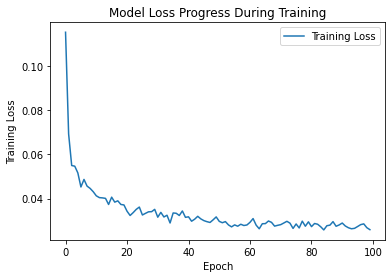

In [56]:
# Look at the progression of the network throughout the epochs
epochs_hist.history.keys()
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

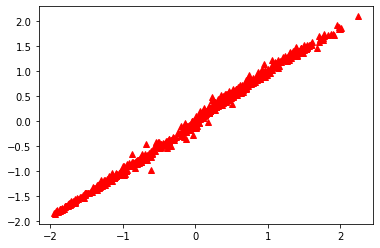

In [57]:
#apply the trained model to the x_test
y_predict = ANN_model.predict(x_test)
plt.plot(y_test, y_predict, '^', color = 'r')

In [58]:
k = x_test.shape[1]
n = len(x_test)
n

757

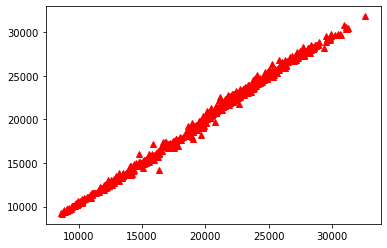

In [59]:
#Transform the data to the original unit
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [62]:
#Let's take a look at the deep learning model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

a_1 = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
a_2 = mean_squared_error(y_test_orig, y_predict_orig)
a_3 = mean_absolute_error(y_test_orig, y_predict_orig)
a_4 = r2_score(y_test_orig, y_predict_orig)
a_5 = 1-(1-a_4)*(n-1)/(n-k-1)

print('RMSE =',a_1, '\nMSE =',a_2, '\nMAE =',a_3, '\nR2 =', a_4, '\nAdjusted R2 =', a_5) 


RMSE = 367.582 
MSE = 135116.2627920092 
MAE = 277.571085217718 
R2 = 0.9955788860381823 
Adjusted R2 = 0.9955494511915657


It seems that the accuracy has met up to 98.9% with the neural network model and it should work pretty well. Next, we would look at the Linear Regression Model


## Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [64]:
LinearRegression_model = LinearRegression() #Create an object
LinearRegression_model.fit(x_train, y_train) #train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#Use the test data to check the accuracy of the model
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_LinearRegression

0.9975457918518837

### Key Performance Indicators

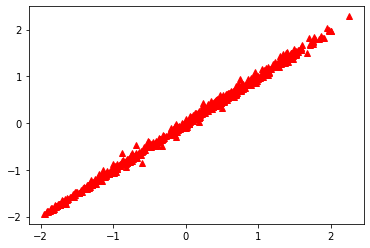

In [66]:
#apply the trained model to the x_test
y_predict = LinearRegression_model.predict(x_test)
plt.plot(y_test, y_predict, '^', color = 'r')

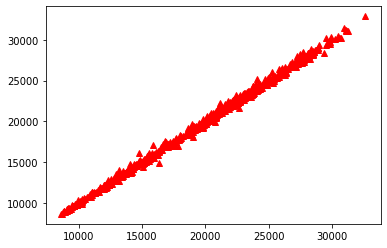

In [67]:
#Transform the data to the original unit
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [68]:
#obtain the length of testing data
k = x_test.shape[1]
n = len(x_test)
n

757

In [69]:
#Statistical Performance of multiple regression
b_1 = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
b_2 = mean_squared_error(y_test_orig, y_predict_orig)
b_3 = mean_absolute_error(y_test_orig, y_predict_orig)
b_4 = r2_score(y_test_orig, y_predict_orig)
b_5 = 1-(1-b_4)*(n-1)/(n-k-1)

print('RMSE =',b_1, '\nMSE =',b_2, '\nMAE =',b_3, '\nR2 =', b_4, '\nAdjusted R2 =', b_5) 


RMSE = 273.869 
MSE = 75004.49795029506 
MAE = 190.59942385853637 
R2 = 0.9975457918518836 
Adjusted R2 = 0.9975294522503649


The linear regression model is better than the neural network model in terms of accuracy

## Decision Tree and Random Forest Models

In [70]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [71]:
#Make a decision tree regressor
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [72]:
#evaluate the regressor
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_DecisionTree

0.9949521217559552

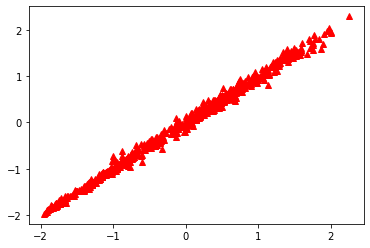

In [73]:
#apply the trained model to the x_test
y_predict = DecisionTree_model.predict(x_test)
plt.plot(y_test, y_predict, '^', color = 'r')

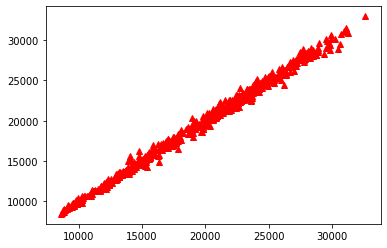

In [74]:
#Transform the data to the original unit
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [75]:
#obtain the length of testing data
k = x_test.shape[1]
n = len(x_test)
n

757

In [77]:
c_1 = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
c_2 = mean_squared_error(y_test_orig, y_predict_orig)
c_3 = mean_absolute_error(y_test_orig, y_predict_orig)
c_4 = r2_score(y_test_orig, y_predict_orig)
c_5 = 1-(1-c_4)*(n-1)/(n-k-1)

print('RMSE =',c_1, '\nMSE =',c_2, '\nMAE =',c_3, '\nR2 =', c_4, '\nAdjusted R2 =', c_5) 


RMSE = 392.774 
MSE = 154271.17447205845 
MAE = 287.858399076178 
R2 = 0.9949521217559552 
Adjusted R2 = 0.99491851404461


In [78]:
#Build Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators = 100, max_depth = 10)
RandomForest_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_RandomForest

0.9972362222394403

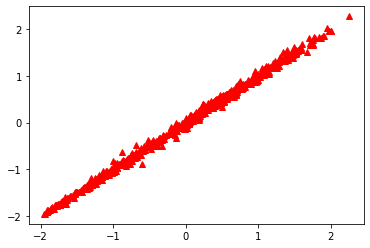

In [80]:
#apply the trained model to the x_test
y_predict = RandomForest_model.predict(x_test)
plt.plot(y_test, y_predict, '^', color = 'r')

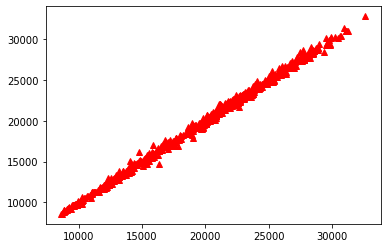

In [81]:
#Transform the data to the original unit
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [83]:
d_1 = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
d_2 = mean_squared_error(y_test_orig, y_predict_orig)
d_3 = mean_absolute_error(y_test_orig, y_predict_orig)
d_4 = r2_score(y_test_orig, y_predict_orig)
d_5 = 1-(1-d_4)*(n-1)/(n-k-1)

print('RMSE =',d_1, '\nMSE =',d_2, '\nMAE =',d_3, '\nR2 =', d_4, '\nAdjusted R2 =', d_5) 

RMSE = 290.629 
MSE = 84465.43686038736 
MAE = 205.83024595163522 
R2 = 0.9972362222394403 
Adjusted R2 = 0.9972178215885711


In [85]:
Summary = pd.DataFrame({
    'Performance Indicator': ['Accuracy','RMSE', 'MSE', 'MAE', 'R^2', 'Adjusted R^2'],
    'Neural Network': [accuracy_ANN, a_1, a_2, a_3, a_4, a_5],
    'Linear Regression': [accuracy_LinearRegression, b_1, b_2, b_3, b_4, b_5],
    'Decision Tree': [accuracy_DecisionTree, c_1, c_2, c_3, c_4, c_5],
    'Random Forest': [accuracy_RandomForest, d_1, d_2, d_3, d_4, d_5]
})


In [86]:
#Let's look at the summary table
Summary

,Performance Indicator,Neural Network,Linear Regression,Decision Tree,Random Forest
0,Accuracy,0.995887,0.997546,0.994952,0.997236
1,RMSE,367.582000,273.869000,392.774000,290.629000
2,MSE,135116.262792,75004.497950,154271.174472,84465.436860
3,MAE,277.571085,190.599424,287.858399,205.830246
4,R^2,0.995579,0.997546,0.994952,0.997236
5,Adjusted R^2,0.995549,0.997529,0.994919,0.997218


## In this experiment, we are glad to see that Multiple Regression Model gives us the most accurate results while Decision Tree Model is the worst out of 4 models. Besides, in terms of statistical errors, multiple regression is having the lowest RMSE, MSE, MAE which indicates the model do the best to reduce the prediction error. On the other hand, highest R-square associated with Multiple Regression suggests that the majority of var in y are being explained.